In [1]:
import numba
import numpy as np
from Magnetar import pfield, surface_model
import matplotlib.pyplot as plt


In [2]:
pfield_test=pfield()
pfield_test.loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
allsurface=surface_model()
import glob
allsurface.loaddata(glob.glob('Sample_Atmospheres/doubleBB_h/*.int'))
aa=allsurface.mcolat
# add the angles
allsurface.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
allsurface.patches=allsurface.patches+allsurface.patches[::-1]

In [3]:
# pfield_test.recalculatephiaverage(1.65426,allsurface,gtt=(1-2*2.0/10.0)**0.5)
pfield_test.recalculate(1.65426,allsurface,gtt=(1-2*2.0/10.0)**0.5)

(1093.993402600518, -1071.4300578633486)

In [4]:
pfield_test.qmean
# print(pfield_test.qmean/pfield_test.imean)

-1071.4300578633486

In [5]:
np.linspace(0,np.pi/2,10)

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633])

In [6]:
import gc
ee = np.logspace(-0.5,1.5,100)
ivec,qvec = [],[]
for i in ee:
    pfield_test.recalculate(i,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    ivec.append(pfield_test.imean)
    qvec.append(pfield_test.qmean)
ivec = np.array(ivec)
qvec = np.array(qvec)

In [7]:
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [8]:
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)

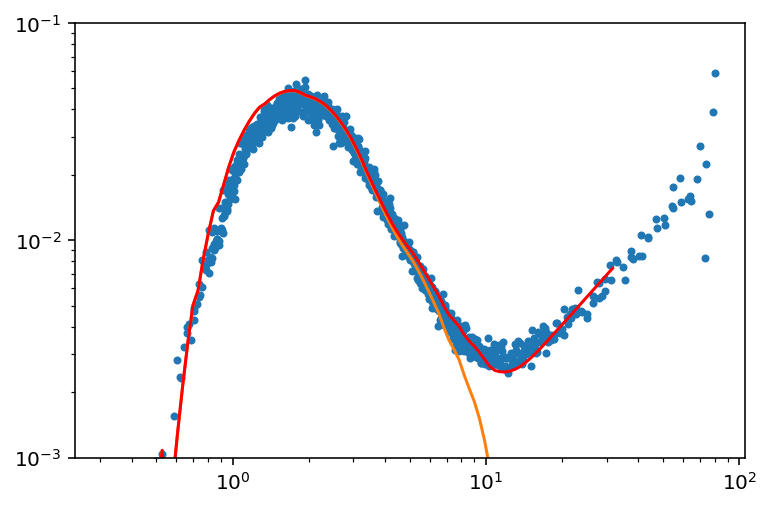

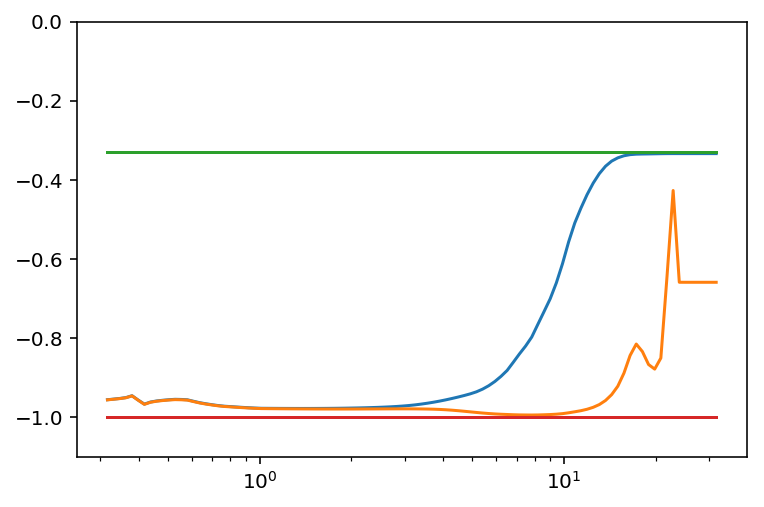

In [9]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/1.7e4)
plt.loglog(ee,totabs*(ivec/1.7e4+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/1.7e4)/(ivec/1.7e4+ee**1.3/1.2e4))
plt.plot(ee,qvec/ivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

In [10]:
mufil,pfi = [],[]
for i in glob.glob('Sample_Pfields/pfield_models_QED/*'):
    print(i)
    pfii= pfield()
    pfii.loaddata(i)
    pfi.append(pfii)
    mufil.append(float(i.rsplit('_',1)[-1][:2]))

Sample_Pfields/pfield_models_QED/pfield_5keV_15deg


Sample_Pfields/pfield_models_QED/pfield_5keV_90deg


Sample_Pfields/pfield_models_QED/pfield_5keV_75deg


Sample_Pfields/pfield_models_QED/pfield_5keV_1.deg


Sample_Pfields/pfield_models_QED/pfield_5keV_45deg


Sample_Pfields/pfield_models_QED/pfield_5keV_0.deg


Sample_Pfields/pfield_models_QED/pfield_5keV_30deg


Sample_Pfields/pfield_models_QED/pfield_5keV_60deg


In [11]:
ind = np.argsort(mufil)
mufil = [mufil[i] for i in ind]
pfi = [pfi[i] for i in ind]
mufil

[0.0, 1.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0]

In [12]:
ee = np.logspace(-0.5,1.5,100)
ivec,qvec = [],[]
for i in range(len(mufil)):
    iint,qint=[],[]
    for en in ee:
        pfi[i].recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
        iint.append(pfi[i].imean)
        qint.append(pfi[i].qmean)
    ivec.append(iint)
    qvec.append(qint)
ivec = np.array(ivec)
qvec = np.array(qvec)
print(ivec)


[[6.45262575e+02 6.37619853e+02 6.26382098e+02 6.13263345e+02
  5.92920817e+02 5.73014983e+02 5.42365696e+02 5.22399460e+02
  4.97751552e+02 4.84247676e+02 4.72693444e+02 4.67988094e+02
  4.86201930e+02 5.16633254e+02 5.85265507e+02 6.60135471e+02
  7.40854756e+02 8.10524842e+02 8.89451337e+02 9.57589803e+02
  1.00892989e+03 1.06544544e+03 1.12404635e+03 1.18063050e+03
  1.22987050e+03 1.26427841e+03 1.27071269e+03 1.27532413e+03
  1.27783974e+03 1.27795862e+03 1.27534957e+03 1.26964874e+03
  1.26045699e+03 1.24733723e+03 1.22981176e+03 1.20735875e+03
  1.17940989e+03 1.14534712e+03 1.10449944e+03 1.05614000e+03
  1.01712094e+03 9.77168267e+02 9.33179781e+02 8.85188431e+02
  8.33340098e+02 7.77949392e+02 7.19492837e+02 6.58662164e+02
  5.96350129e+02 5.33752875e+02 4.72442317e+02 4.14434811e+02
  3.66281464e+02 3.24560166e+02 2.87878634e+02 2.56245285e+02
  2.29509070e+02 2.07315893e+02 1.89055722e+02 1.73800514e+02
  1.59800401e+02 1.45330417e+02 1.31713541e+02 1.19141582e+02
  1.0783

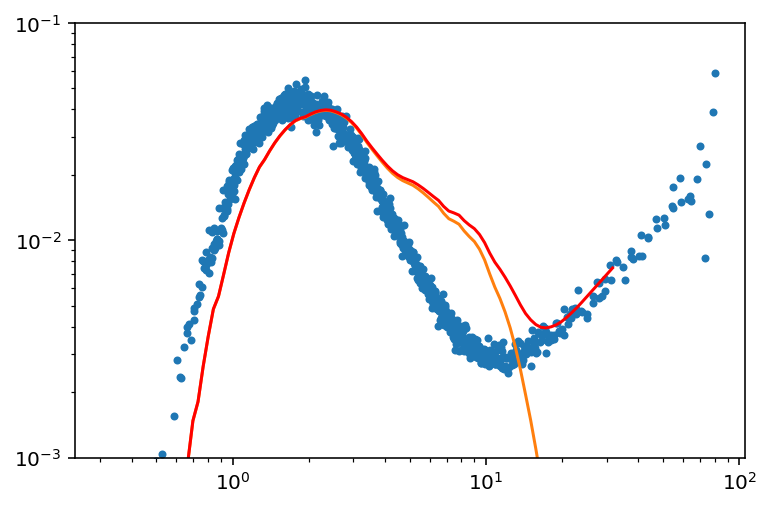

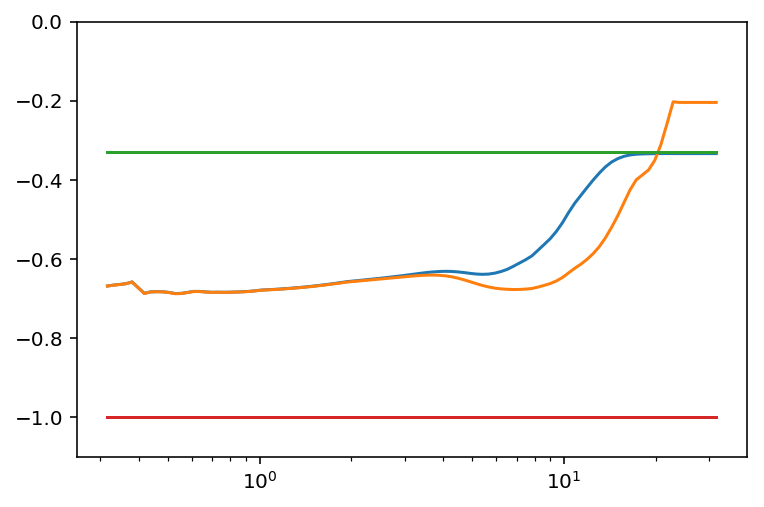

In [13]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee/4e4)
plt.loglog(ee,totabs*(totivec*ee/4e4+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec/1.6e4)/(totivec/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

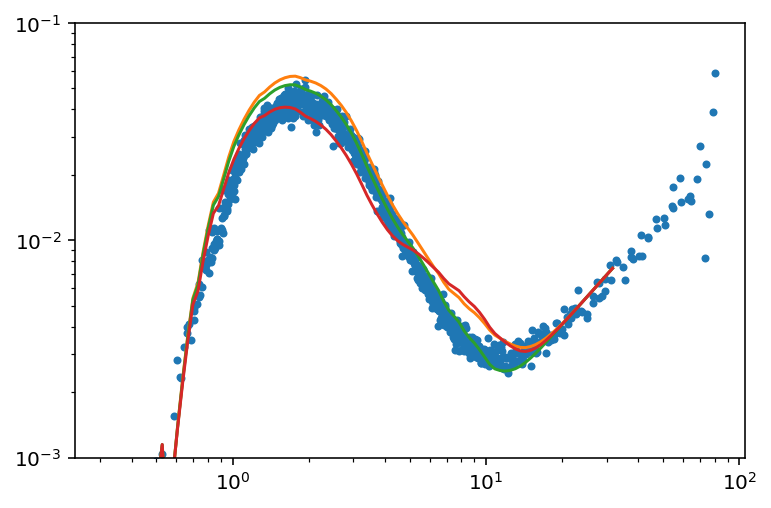

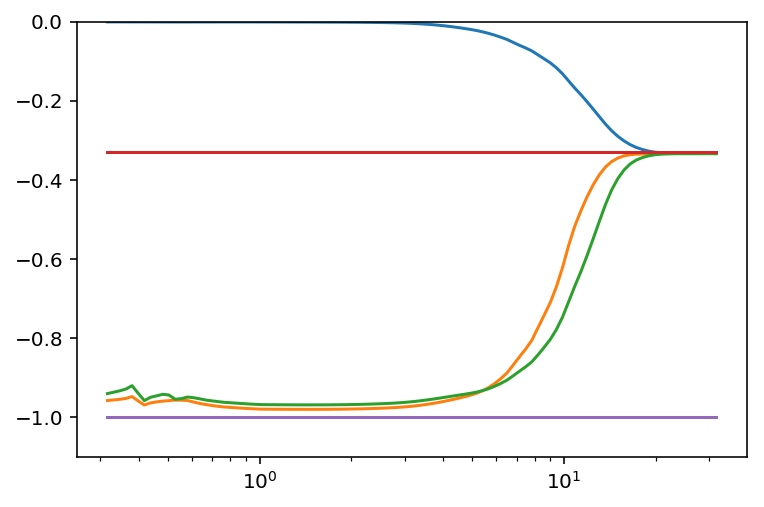

In [14]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]/1.6e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]/1.6e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]/1.6e4+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]/1.6e4)/(ivec[0]/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]/1.6e4)/(ivec[3]/1.6e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]/1.6e4)/(ivec[6]/1.6e4+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.0)
plt.show()

In [15]:
pf30=pfield()
pf30.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(5,allsurface)

(542.150295008111, -222.03240175196683)

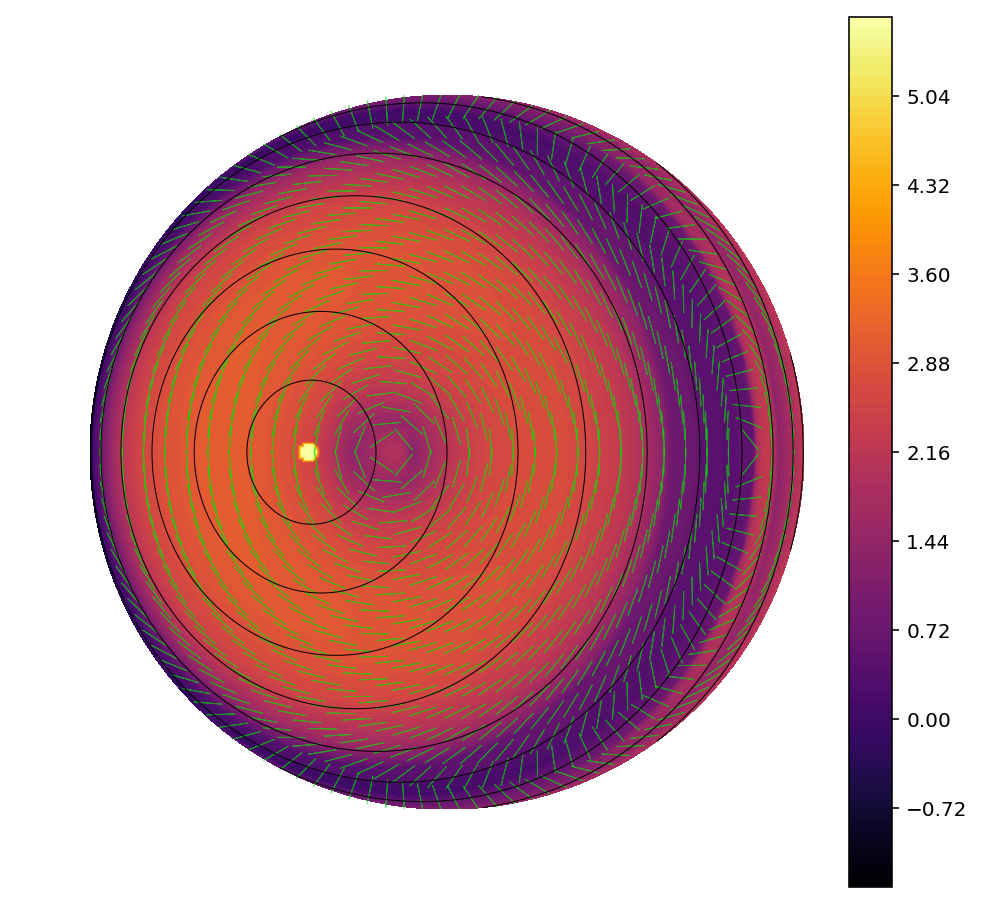

In [16]:
q=pf30.plot(datamap=np.log10(pf30.data['X']+pf30.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30NoQED.pdf',bbox_inches='tight')

In [17]:
pf30Q=pfield()
pf30Q.loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
pf30Q.recalculate(5,allsurface)


(542.1323227281072, -532.4106949979113)

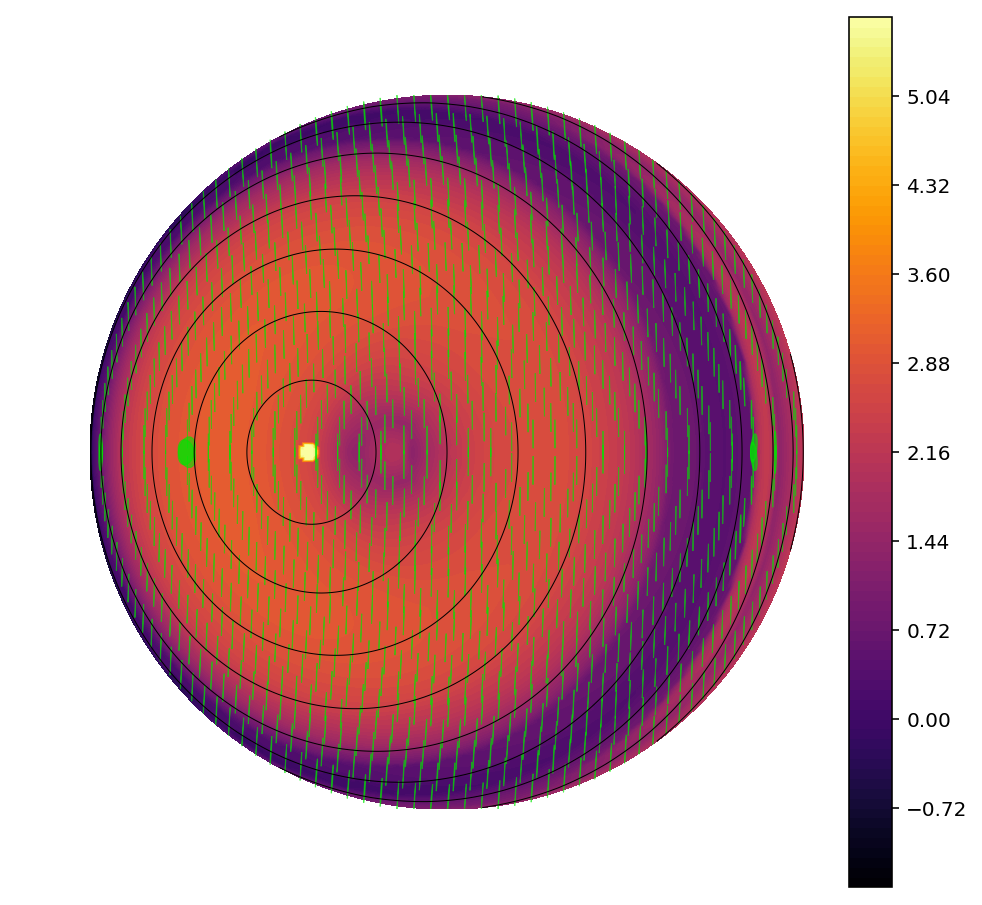

In [18]:
q=pf30Q.plot(datamap=np.log10(pf30Q.data['X']+pf30Q.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30.pdf',bbox_inches='tight')

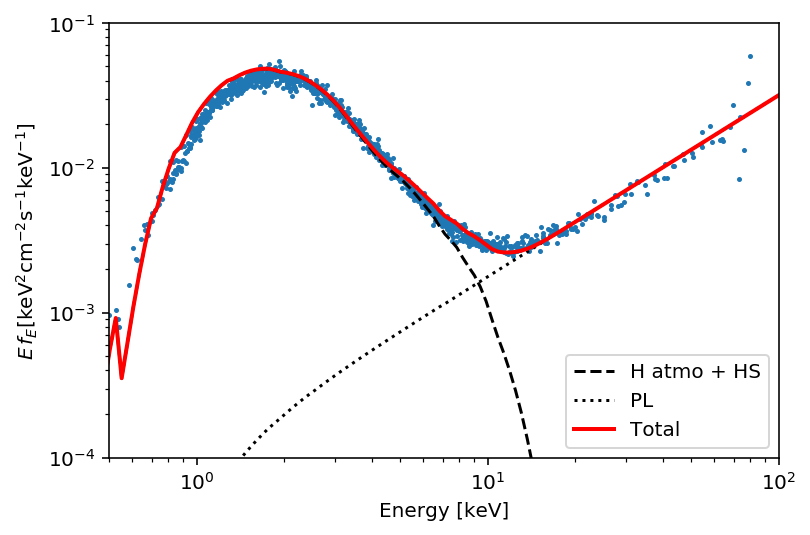

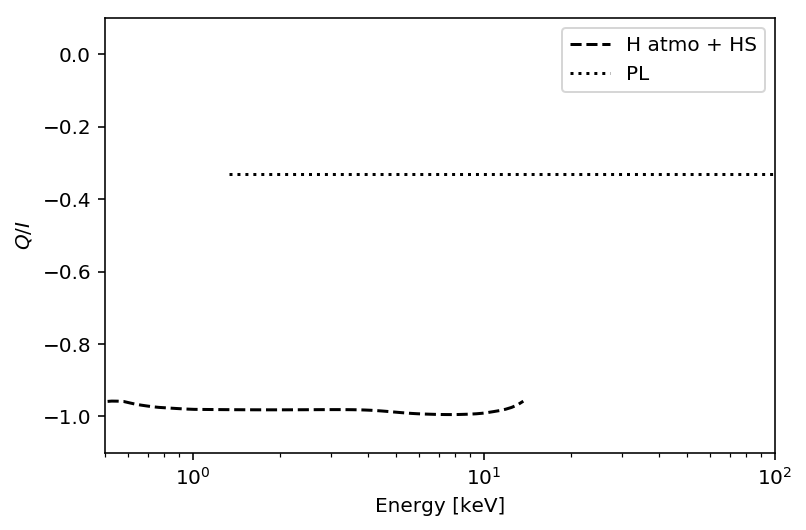

In [36]:
ep = np.logspace(1.51,2,20)
enew = np.concatenate((ee,ep))
ssabs2=np.interp(enew,eabs,sabs)/(enew)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs2=np.exp(-0.63e22*ssabs2)
ivec3ext = np.concatenate((ivec[3],np.full(20,ivec[3][-1])))
qvec3ext = np.concatenate((qvec[3],np.full(20,qvec[3][-1])))
ivecNext = np.concatenate((ivecNQED30,np.full(20,ivecNQED30[-1])))
qvecNext = np.concatenate((qvecNQED30,np.full(20,qvecNQED30[-1])))
plt.loglog(datae,dataf,'.',markersize=3)
plt.loglog(enew,totabs2*(ivec3ext/1.7e4),'k--',label='H atmo + HS')
plt.loglog(enew,totabs2*(enew**1.25/1.0e4),'k:',label='PL')
plt.loglog(enew,totabs2*(ivec3ext/1.7e4+enew**1.25/1.0e4),'r',label='Total',linewidth=2)
plt.xlim(0.5,1.0e2)
plt.ylim(1e-4,1e-1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
plt.savefig('HotSpot.pdf',bbox_inches='tight')
plt.show()
#plt.plot(ee,totqvec/totivec)
#plt.plot([enew[0],enew[-1]],[-1.0,-1.0],'k')
plt.plot(enew[0:82],qvec3ext[0:82]/ivec3ext[0:82],'k--',label='H atmo + HS')
plt.plot([enew[31],enew[-1]],[-0.33,-0.33],'k:',label='PL')
plt.plot(enew,(-enew**1.25/1.0e4/50+qvecNext/1.6e4)/(ivecNext/1.6e4+enew**1.3/1.2e4),label='Total w/o QED')
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'r',label='Total w/ QED',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
plt.ylim(-1.1,0.1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('HotSpotQI.pdf',bbox_inches='tight')
plt.show()

Text(0, 0.5, '$Q/I$')

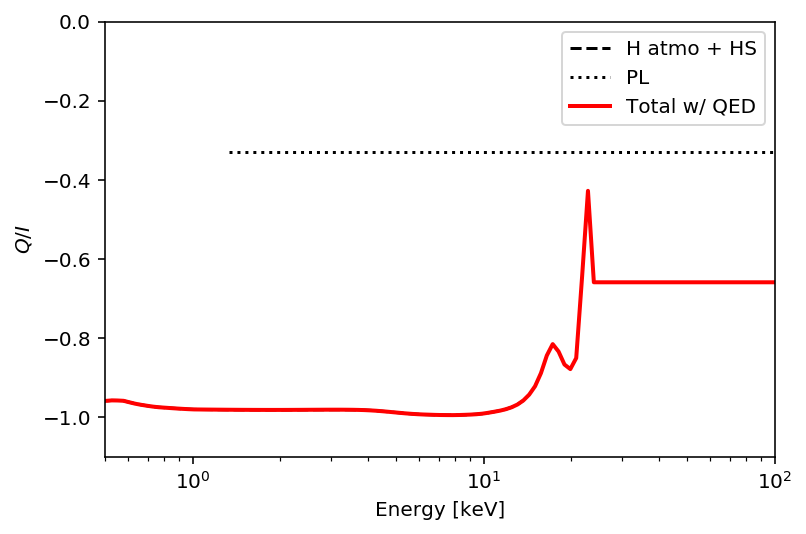

In [37]:
plt.plot(enew[0:82],qvec3ext[0:82]/ivec3ext[0:82],'k--',label='H atmo + HS')
plt.plot([enew[31],enew[-1]],[-0.33,-0.33],'k:',label='PL')
plt.plot(ee,(qvecNQED30/1.6e4)/(ivecNQED30/1.6e4),label='Total w/o QED')
plt.plot(enew,(qvec3ext/1.7e4)/(ivec3ext/1.7e4),'r',label='Total w/ QED',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
plt.ylim(-1.1,0.0)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')

In [21]:
pfii=pfield()
pfii.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pfiNQED30=pfii

In [22]:
iint,qint=[],[]
for en in ee:
    pfiNQED30.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED30.imean)
    qint.append(pfiNQED30.qmean)
ivecNQED30=iint
qvecNQED30=qint
ivecNQED30 = np.array(ivecNQED30)
qvecNQED30 = np.array(qvecNQED30)

In [24]:
pfii=pfield()
pfii.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_45')
pfiNQED45=pfii

In [25]:
iint,qint=[],[]
for en in ee:
    pfiNQED45.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED45.imean)
    qint.append(pfiNQED45.qmean)
ivecNQED45=iint
qvecNQED45=qint
ivecNQED45 = np.array(ivecNQED45)
qvecNQED45 = np.array(qvecNQED45)

In [26]:
pfiNQED75=pfield()
pfiNQED75.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_75')

In [27]:
iint,qint=[],[]
for en in ee:
    pfiNQED75.recalculate(en,allsurface,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED75.imean)
    qint.append(pfiNQED75.qmean)
ivecNQED75=iint
qvecNQED75=qint
ivecNQED75 = np.array(ivecNQED75)
qvecNQED75 = np.array(qvecNQED75)

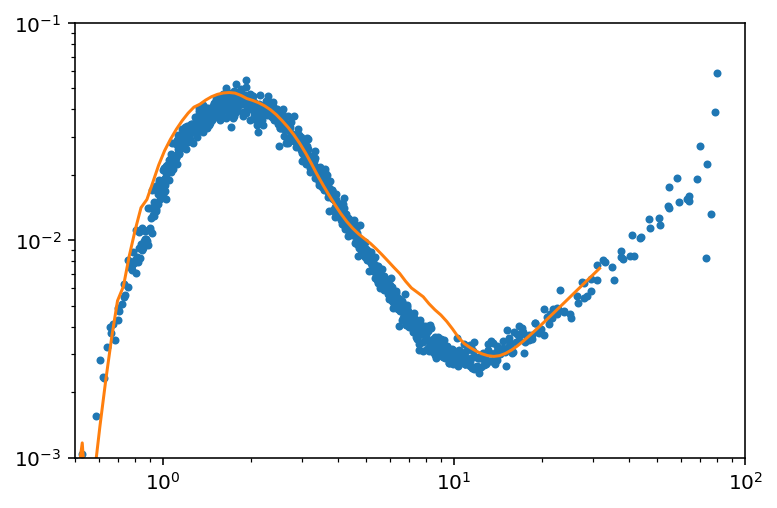

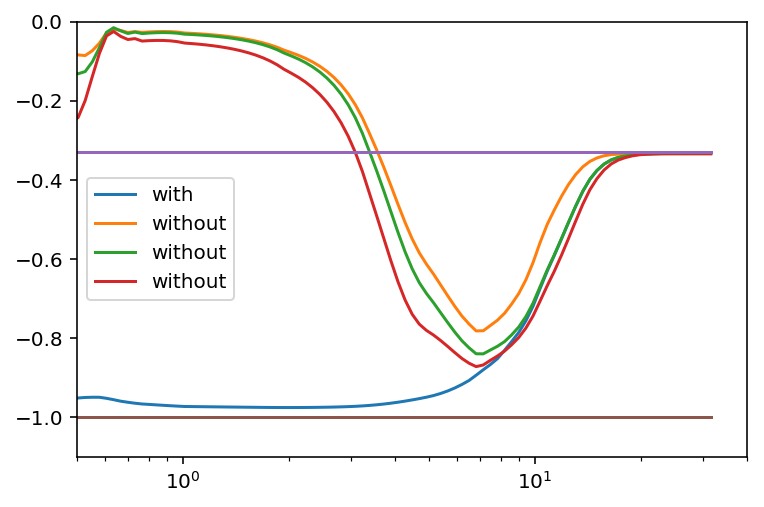

In [28]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivecNQED45/1.6e4+ee**1.3/1.2e4))
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)
plt.show()

plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[4]/1.6e4)/(ivec[4]/1.6e4+ee**1.3/1.2e4),label='with')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED30/1.6e4)/(ivecNQED30/1.6e4+ee**1.3/1.2e4),label='without')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED45/1.6e4)/(ivecNQED45/1.6e4+ee**1.3/1.2e4),label='without')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED75/1.6e4)/(ivecNQED75/1.6e4+ee**1.3/1.2e4),label='without')
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.legend()
plt.xlim(0.5,40)
plt.ylim(-1.1,0.0)
plt.savefig('HS.pdf',bbox_inches='tight')
plt.show()

In [29]:
ee2= np.logspace(-0.1,2,1000)
eabs,sabs=np.loadtxt('2019-07-17/tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee2,eabs,sabs)/(ee2)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs2=np.exp(-1.28e22*ssabs)

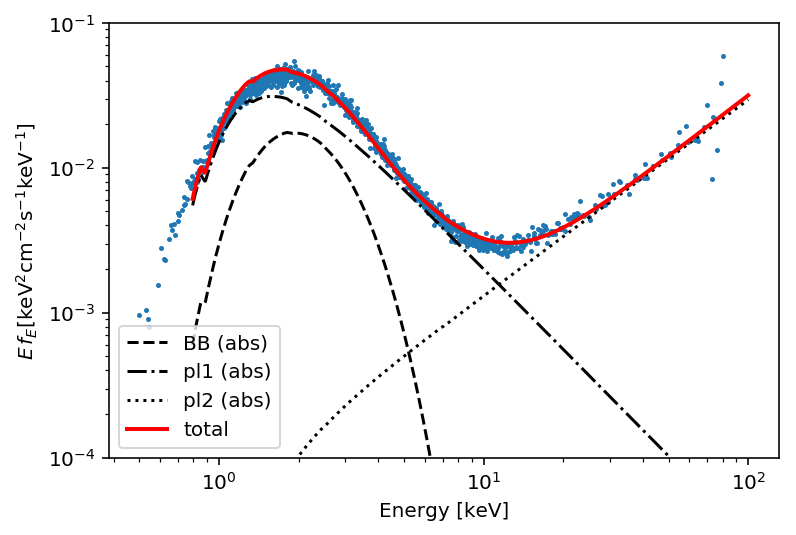

In [30]:
plt.loglog(datae,dataf,'.',markersize=3)
plt.loglog(ee2,totabs2*ee2**3/(np.exp(ee2/0.48)-1)/5,'k--',label='BB (abs)')
plt.loglog(ee2,totabs2*ee2**(-1.85)/7,'k-.',label='pl1 (abs)')
plt.loglog(ee2,totabs2*ee2**1.35/1.7e4,'k:',label='pl2 (abs)')
plt.loglog(ee2,totabs2*(ee2**(-1.85)/7+ee2**3/(np.exp(ee2/0.48)-1)/5+ee2**1.4/2e4),'r',label='total',linewidth=2)
plt.ylim(1e-4,1e-1)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
plt.savefig('4U.pdf',bbox_inches='tight')
plt.show()


In [31]:
eCompO,QIcompO = np.loadtxt("CompO.txt",unpack=True)

In [32]:
eNob,QINob = np.loadtxt("Nobili.txt",unpack=True)

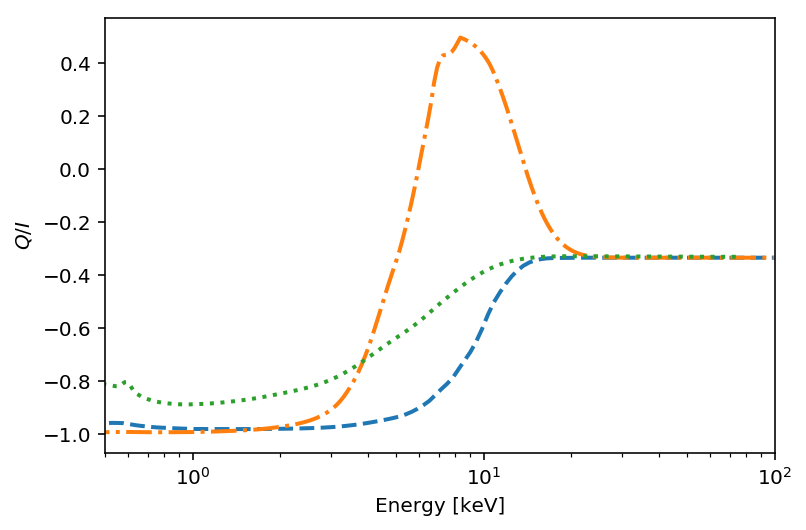

In [33]:
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'--',linewidth=2)
plt.plot(eCompO,QIcompO,'-.',linewidth=2)
plt.plot(eNob,QINob,':',linewidth=2)
plt.xscale("log")
plt.xlim(0.5,1.0e2)
#plt.ylim(-1.1,0.1)
#plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('Mag3.pdf',bbox_inches='tight')
plt.show()

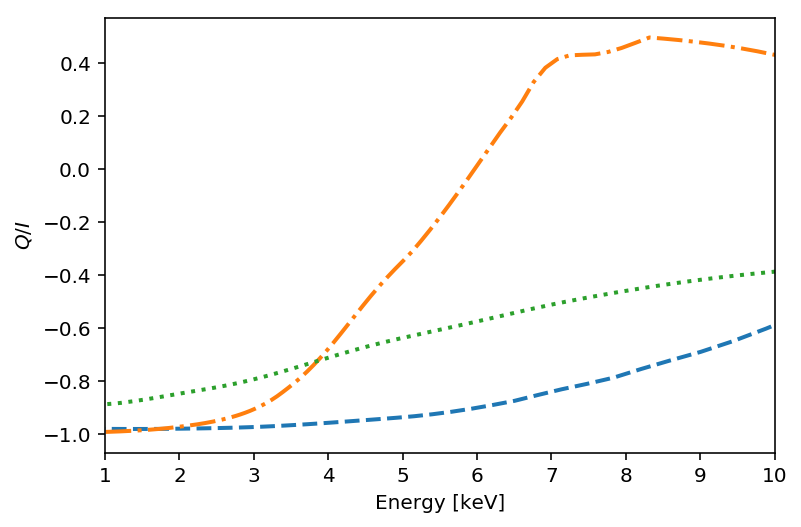

In [34]:
plt.plot(enew,(-enew**1.25/1.0e4/3+qvec3ext/1.7e4)/(ivec3ext/1.7e4+enew**1.25/1.0e4),'--',linewidth=2)
plt.plot(eCompO,QIcompO,'-.',linewidth=2)
plt.plot(eNob,QINob,':',linewidth=2)
#plt.xscale("log")
plt.xlim(1,1.0e1)
#plt.ylim(-1.1,0.1)
#plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('Mag3small.pdf',bbox_inches='tight')
plt.show()

In [35]:
for _i,_a in enumerate(mufil):
    np.savetxt('fern_input_%g.dat' % _a,np.transpose([ee,ivec[_i],qvec[_i]]))